In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%config IPCompleter.greedy=True

pd.options.display.float_format='{:,.2f}'.format

# 1. Carga de datos

In [17]:
df_dia=pd.read_pickle('../cas2/df_dia.pickle')
df=pd.read_pickle('../cas2/df.pickle')

# 2. Analisi datos

## 2.1 Observación 1 (fichero 2) ¿Generan las plantas la misma energia?

In [62]:
df

,planta,mes,dia,hora,minuto,sensor_id,irradiacion,t_ambiente,t_modulo,inverter_id,kw_dc,kw_ac,eficiencia,kw_dia,kw_total
fecha,,,,,,,,,,,,,,,
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1BY6WEcLGh8j5v7,0.00,0.00,0.00,0.00,"6,259,559.00"
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,1IF53ai7Xc0U56Y,0.00,0.00,0.00,0.00,"6,183,645.00"
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,3PZuoBAID5Wc2HD,0.00,0.00,0.00,0.00,"6,987,759.00"
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,7JYdWkrLSPkdwr4,0.00,0.00,0.00,0.00,"7,602,960.00"
2020-05-15 00:00:00,p1,5,15,0,0,HmiyD2TTLFNqkNe,0.00,25.18,22.86,McdE0feGgRqW7Ca,0.00,0.00,0.00,0.00,"7,158,964.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,q49J1IKaHRwDQnt,0.00,0.00,0.00,"4,157.00","520,758.00"
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,rrq4fwE8jgrTyWY,0.00,0.00,0.00,"3,931.00","121,131,356.00"
2020-06-17 23:45:00,p2,6,17,23,45,iq8k7ZNt4Mwm3w0,0.00,23.20,22.54,vOuJvMaM2sgwLmb,0.00,0.00,0.00,"4,322.00","2,427,691.00"


In [63]:
temp1=df.loc[(df.sensor_id=='HmiyD2TTLFNqkNe')|(df.sensor_id=='iq8k7ZNt4Mwm3w0'),['planta','irradiacion','kw_dc','kw_ac']].set_index('planta')

In [64]:
temp2=temp1.groupby('planta').agg({'irradiacion':'mean','kw_dc':'mean','kw_ac':'mean'})
temp2

,irradiacion,kw_dc,kw_ac
planta,,,
p1,0.23,"3,147.18",307.78
p2,0.23,246.70,241.28


Text(0, 0.5, 'kw')

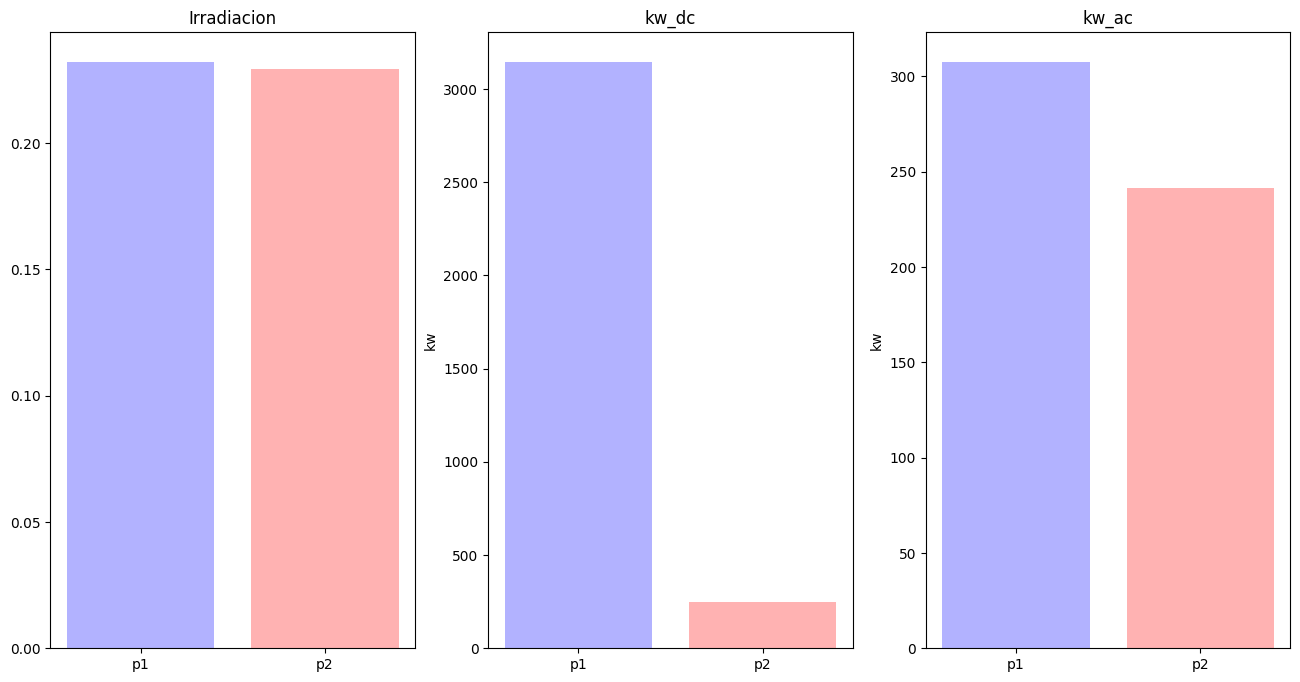

In [65]:
f,ax=plt.subplots(nrows=1,ncols=3,figsize=(16,8))
ax[0].bar(temp2.index,temp2.irradiacion,color=['blue','red'],alpha=0.3)
ax[1].bar(temp2.index,temp2.kw_dc,color=['blue','red'],alpha=0.3)
ax[2].bar(temp2.index,temp2.kw_ac,color=['blue','red'],alpha=0.3)
ax[0].set_title('Irradiacion')
ax[1].set_title('kw_dc')
ax[2].set_title('kw_ac')
ax[1].set_ylabel('kw')
ax[2].set_ylabel('kw')

COnclusiones:

**La irradiación es practicamente igual para las dos plantas.**

**A misma irradiación hay más de 10 veces de kw_dc en la planta 1**

**Sabemos que la conversión de dc a ac es próxima al 90-100%**

**por lo tanto, sospechamos de un error de escala en kw_dc, seguramente no son kw** 


## 2.2 Misma irradiancia en p1 y p2 pero diferente generación de dc

In [67]:
temp3=df.loc[(df.sensor_id=='HmiyD2TTLFNqkNe')|(df.sensor_id=='iq8k7ZNt4Mwm3w0'),['planta','irradiacion','kw_dc','kw_ac','t_ambiente','t_modulo']].set_index('planta')
temp3

,irradiacion,kw_dc,kw_ac,t_ambiente,t_modulo
planta,,,,,
p1,0.00,0.00,0.00,25.18,22.86
p1,0.00,0.00,0.00,25.18,22.86
p1,0.00,0.00,0.00,25.18,22.86
p1,0.00,0.00,0.00,25.18,22.86
p1,0.00,0.00,0.00,25.18,22.86
...,...,...,...,...,...
p2,0.00,0.00,0.00,23.20,22.54
p2,0.00,0.00,0.00,23.20,22.54
p2,0.00,0.00,0.00,23.20,22.54


In [68]:
temp3.select_dtypes('number').corr()

,irradiacion,kw_dc,kw_ac,t_ambiente,t_modulo
irradiacion,1.00,0.66,0.88,0.66,0.95
kw_dc,0.66,1.00,0.75,0.29,0.64
kw_ac,0.88,0.75,1.00,0.57,0.85
t_ambiente,0.66,0.29,0.57,1.00,0.82
t_modulo,0.95,0.64,0.85,0.82,1.00


A más irradiacion más temperatura del modulo.

Mediante los datos he deducido que hay un error en la escala de dc en p1.

Pero vamos a demostrar que los paneles estan limpios y por tanto no son los culpables de que la conversion de dc a ac sea del 10%.

Para demostrar esto vamos a buscar modulos que produzcan poca dc a irradiaciones altas o lo que es lo mismo una baja o nula eficiencia en horas donde hay irradiación.

<Axes: xlabel='hora', ylabel='eficiencia'>

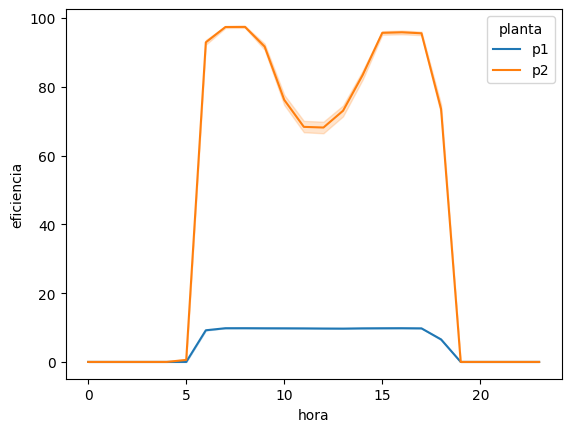

In [120]:
sns.lineplot(data=df,x='hora',y='eficiencia',hue='planta')

Hay perdida de eficiencia en horas de irradiancia máxima.

In [165]:
temp5=df[(df.eficiencia==0)&(df.planta=='p2')&(df.hora.between(8,15))]
temp5.shape

(3697, 17)

Podemos osbervar que hay 3697 registros para la planta 2 con eficiencia 0 en horas de sol.

In [140]:
temp5.groupby('eficiencia')[['irradiacion','t_ambiente','t_modulo']].mean()

,irradiacion,t_ambiente,t_modulo
eficiencia,,,
0.00,0.18,28.42,31.96


No parece que haya sobre calentamiento de los paneles ya que T ambiente y T del modulo son muy parecidas. A continuación lo voy a confirmar.

<Axes: xlabel='t_modulo', ylabel='kw_dc'>

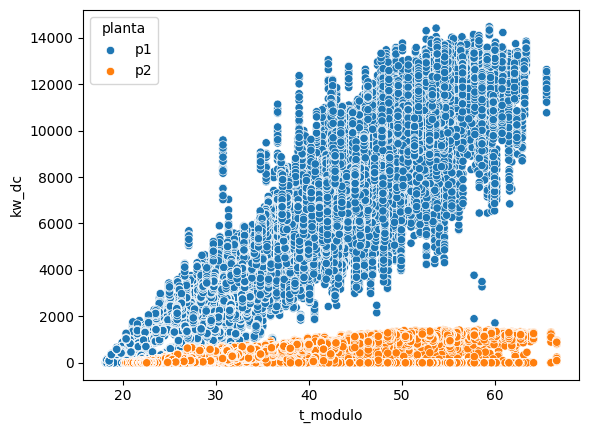

In [148]:
sns.scatterplot(data=df,x='t_modulo',y='kw_dc',hue='planta')

Confirmamos que la Temperatura no tiene efecto en la eficiencia, ya que hay muchos casos de temperaturas altas donde se genera DC, y también de kw_dc igual a cero en casi todos los rangos de temperaturas.

Vamos a analizar los inverters, a ver si podemos detectar alguna anomalia.

## 2.3 Inverters

In [166]:
temp = df.between_time('08:00:00','15:00:00')
temp = temp[temp.planta == 'p2'] 

In [167]:
#Creo variable cuando eficiencia sea 0, y por lo tanto  no se genera dc:
temp['kw_dc_cero']=np.where(temp['kw_dc']==0,1,0)

<Axes: xlabel='inverter_id'>

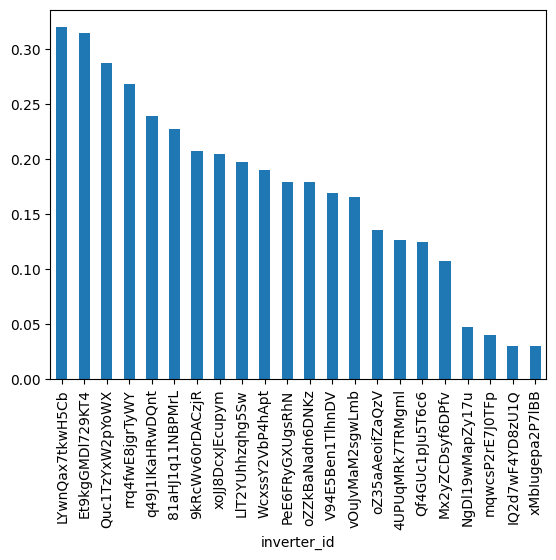

In [168]:
temp.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending=False).plot.bar()

Existe gran diferencia en el porcentaje de producción cero de DC por inverter.

Desde algunos que tienen menos del 5% hasta algunos que superan el 30%.

**En la planta 2 existen varios inverters a los que no está llegando suficiente producción de DC, y por tanto cuyos módulos necesitan revisión.**

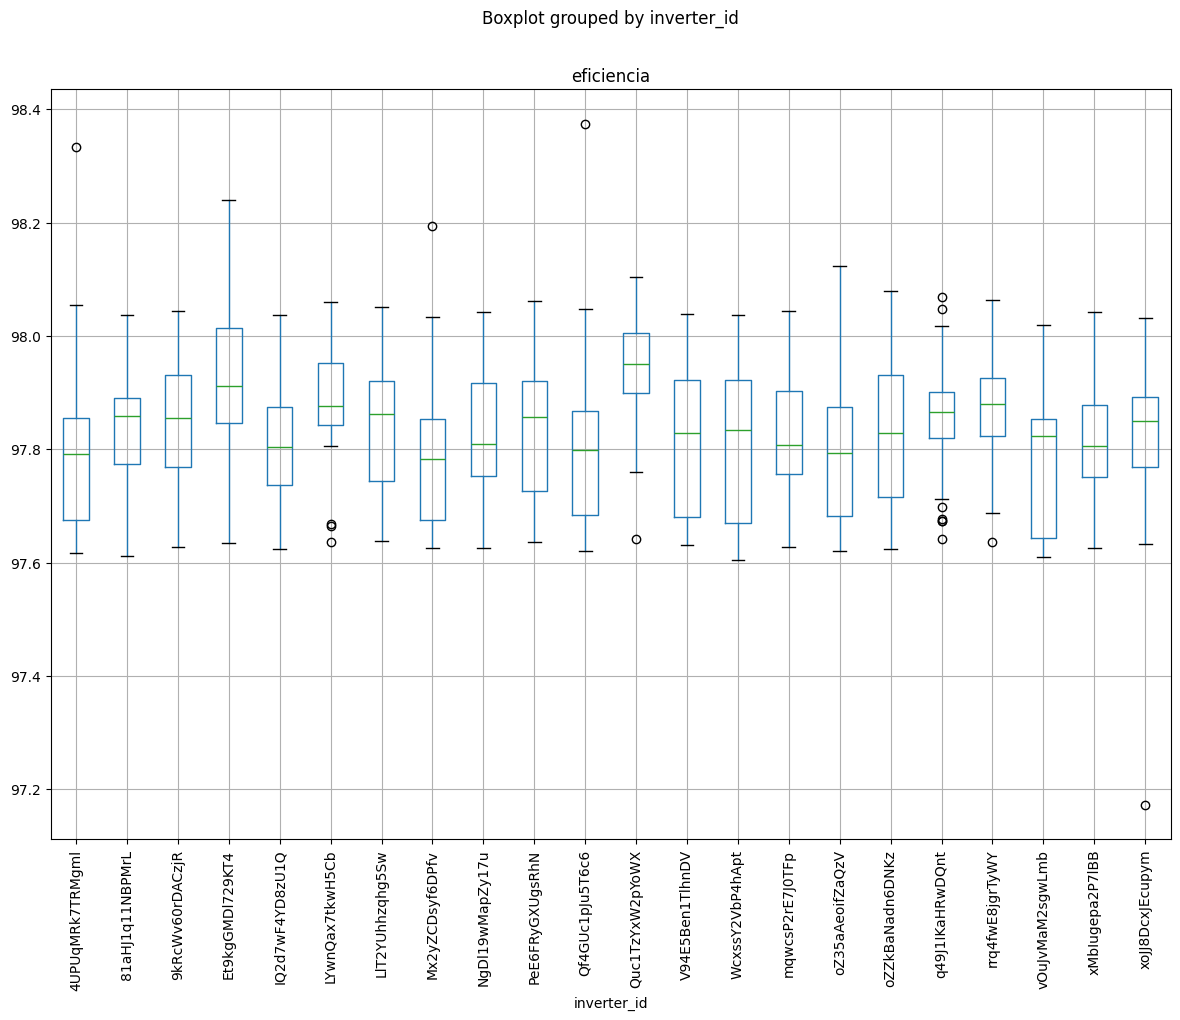

In [171]:
#Vamos a analizar los inverters desde el punto de vista de la eficiencia media para ver si hay "buenos y malos".
temp[temp.kw_dc > 0].groupby(['inverter_id','date'],as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

**Una vez descontando el problema de la no generación de DC, los inverters de la planta 2 sí funcionan bien y hacen bien el trabajo de transformación a AC.**

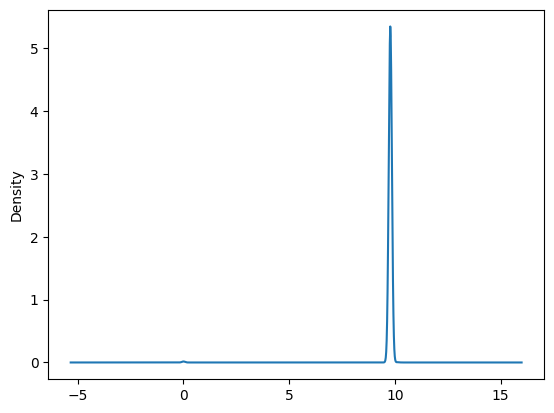

In [173]:
#Realizo mismo ejercicio para la planta 1 
temp2 = df.between_time('08:00:00','15:00:00')
temp2 = temp2[temp2.planta == 'p1']
temp2['kw_dc_cero'] = np.where(temp2['kw_dc'] == 0, 1, 0)
temp2.eficiencia.plot.density();

En la planta 1 todos los inverters tienen una eficiencia constante (aunque muy baja)

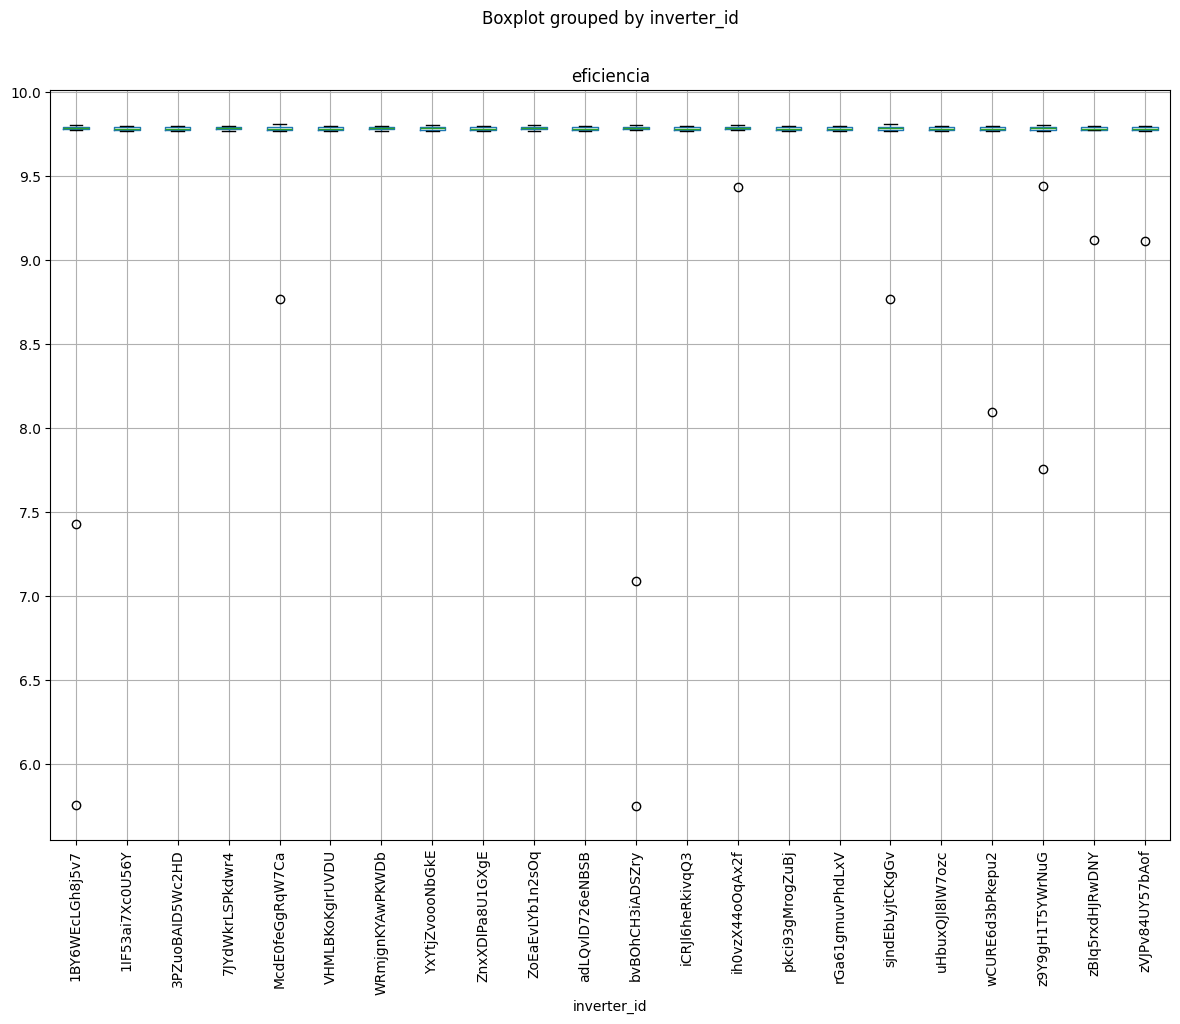

In [175]:
temp2.groupby(['inverter_id','date'],as_index = False).eficiencia.mean().boxplot(column = 'eficiencia', by = 'inverter_id', figsize = (14,10))
plt.xticks(rotation = 90);

Todos los inverters estan alrededor del 10% de conversión.

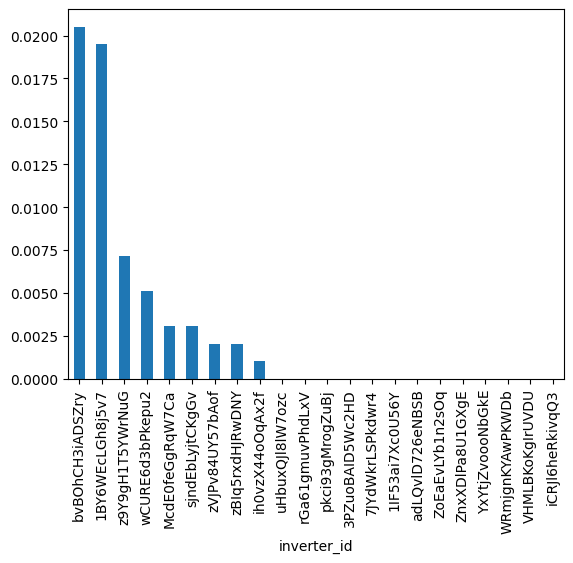

In [176]:
temp2.groupby('inverter_id').kw_dc_cero.mean().sort_values(ascending = False).plot.bar();

Se puede observar que algunos inverters han tenido fallos pero su magnitud es inferior al 2% de las mediciones.

Por tanto la generación de DC en la planta 1 sí es correcta, y el fallo está en la transformación de DC a AC.

## 2.4 Limpieza modulos

<Axes: xlabel='hora', ylabel='irradiacion'>

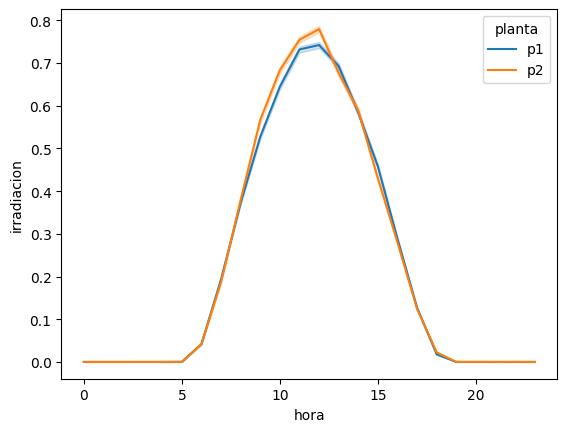

In [98]:
sns.lineplot(data=df,x='hora',y='irradiacion',hue='planta')

Veo que la irradiación se reparte de forma logica en las horas de sol.

Vamos a ver si se mantiene esta distribución por planta y dia.

In [110]:
df['date']=df.index.date
df_hora_p1=df[df.planta=='p1'].groupby(['date','planta','hora']).kw_dc.sum()
df_hora_p1

date        planta  hora
2020-05-15  p1      0      0.00
                    1      0.00
                    2      0.00
                    3      0.00
                    4      0.00
                           ... 
2020-06-17  p1      19     0.00
                    20     0.00
                    21     0.00
                    22     0.00
                    23     0.00
Name: kw_dc, Length: 796, dtype: float64

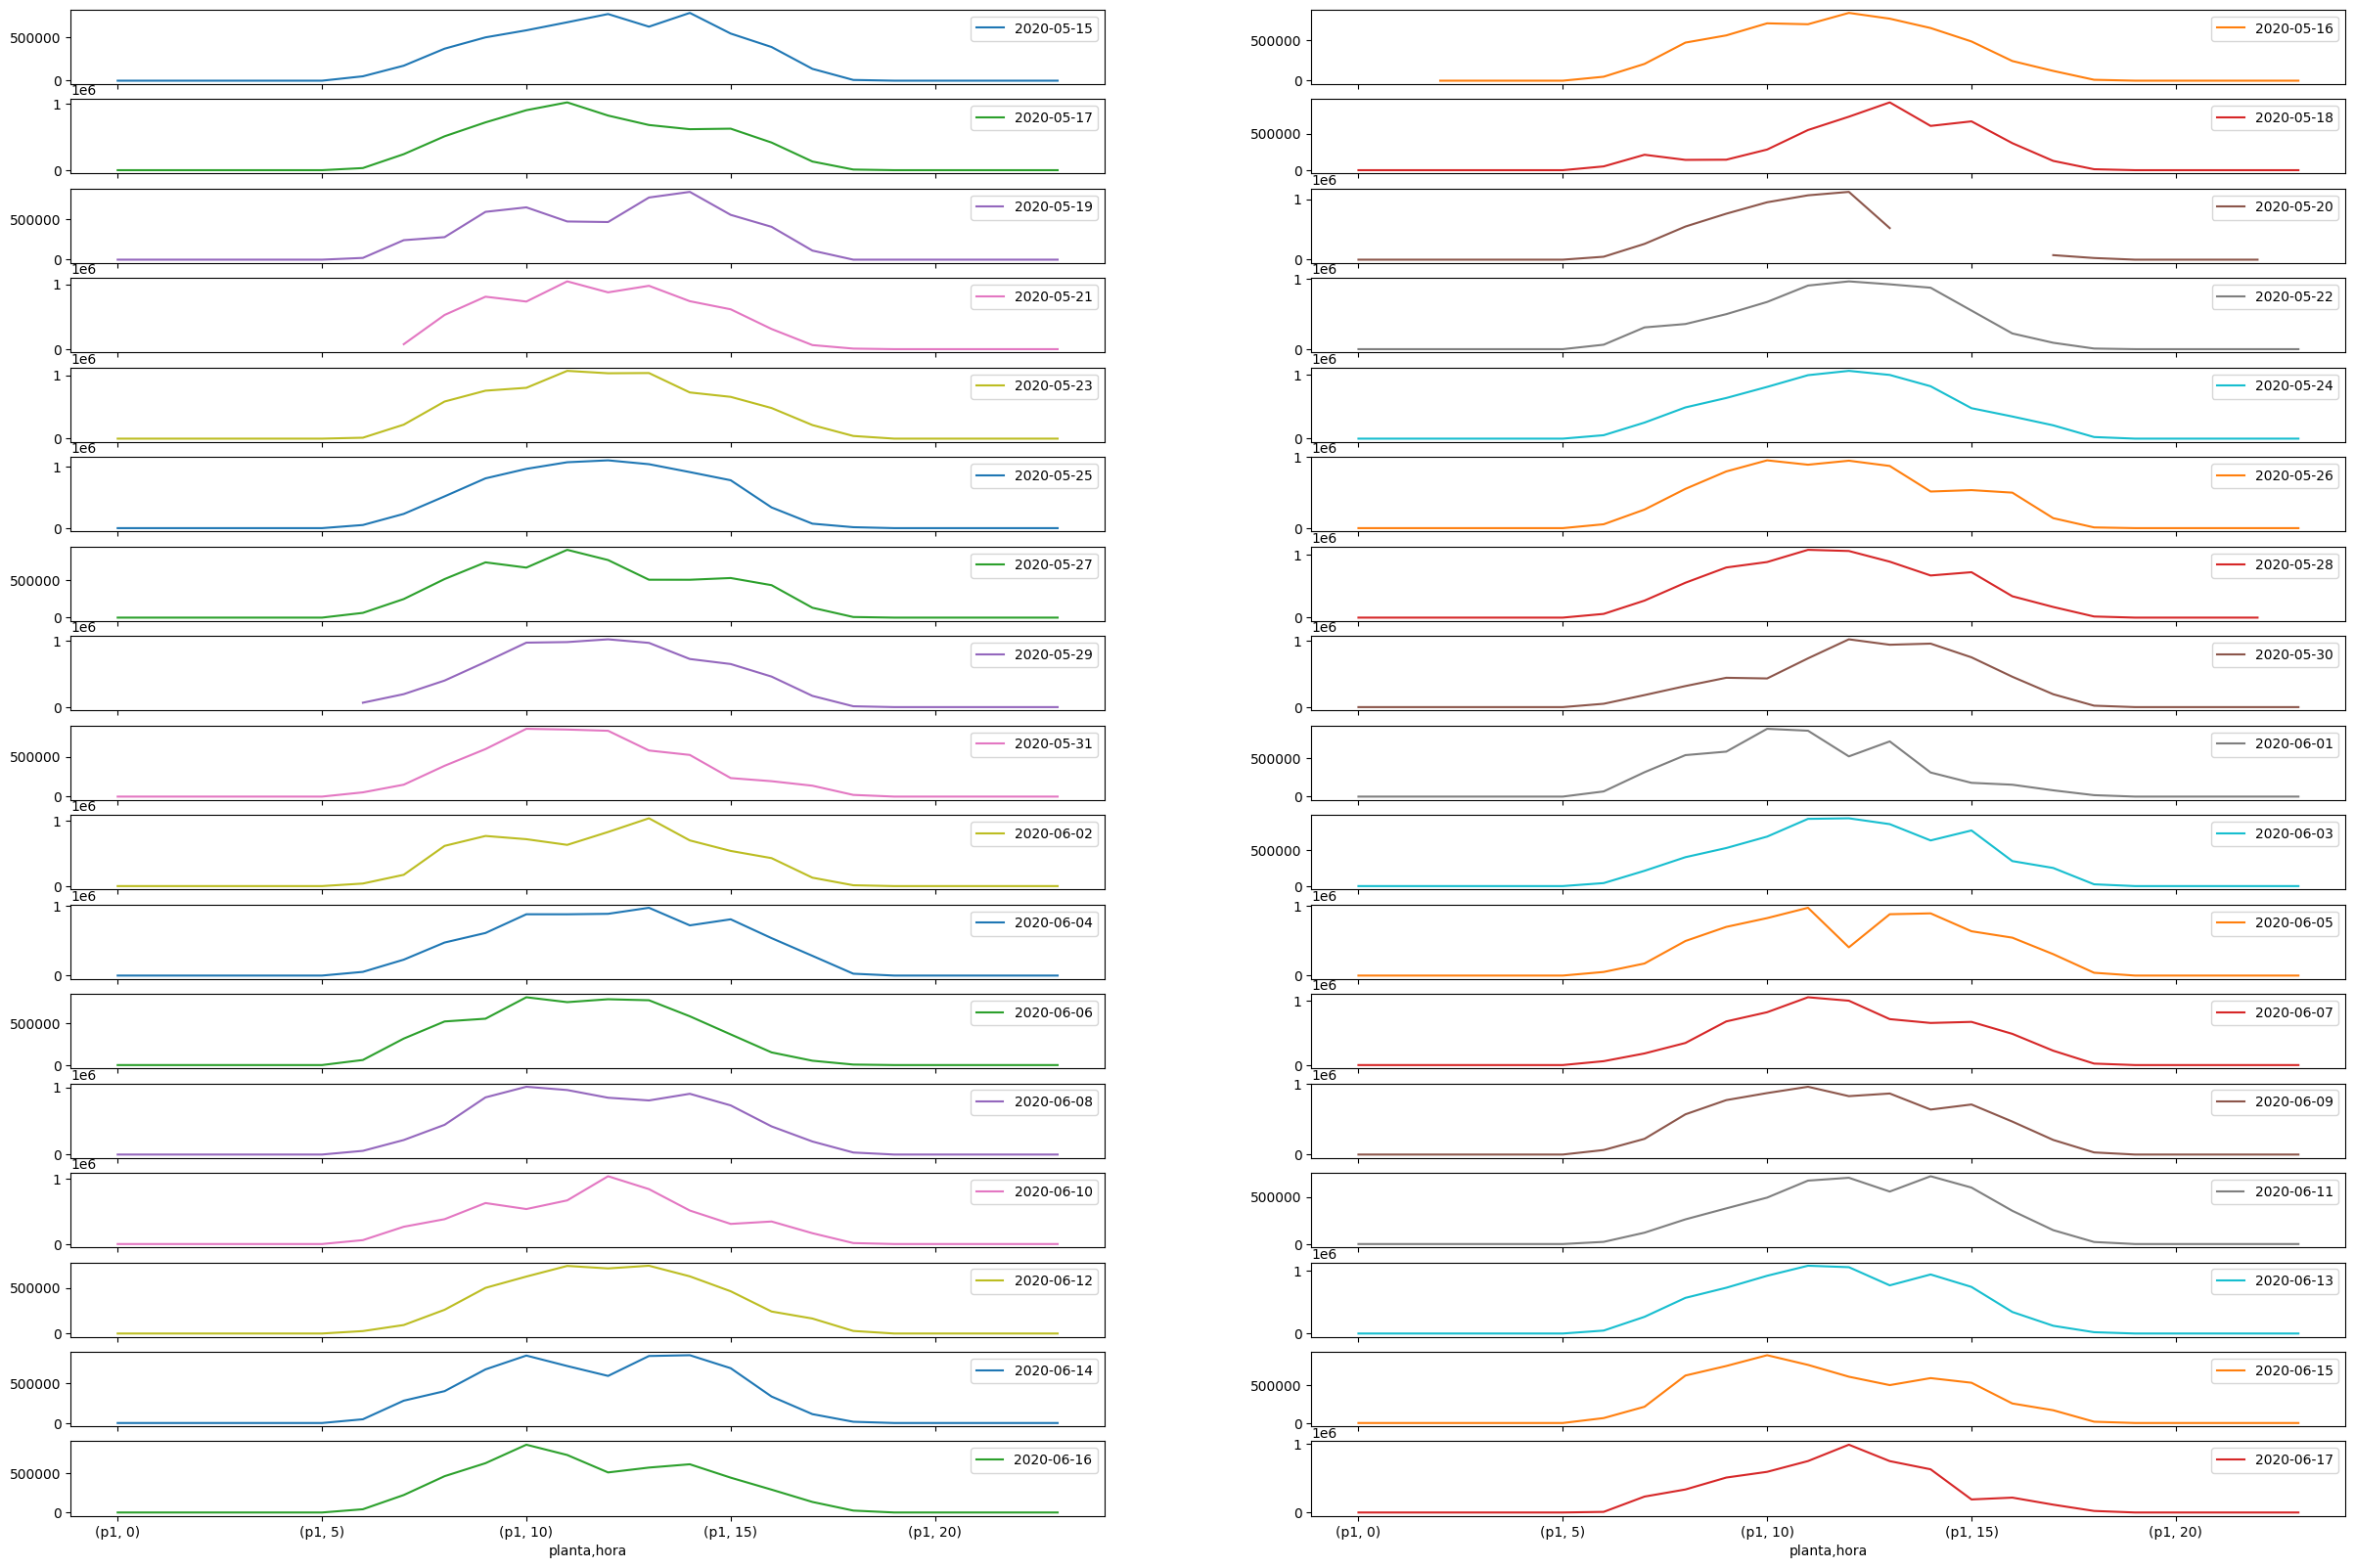

In [116]:
df_hora_p1.unstack(level=0).plot(subplots=True,layout=(17,2),figsize=(30,20),sharex=True);

La distribución de kw_dc a hora es muy similar al grafico irradiacion por hora.Tiene sentido, todo ok

In [117]:
df_hora_p2=df[df.planta=='p2'].groupby(['date','planta','hora']).kw_dc.sum()
df_hora_p2

date        planta  hora
2020-05-15  p2      0      0.00
                    1      0.00
                    2      0.00
                    3      0.00
                    4      0.00
                           ... 
2020-06-17  p2      19     0.00
                    20     0.00
                    21     0.00
                    22     0.00
                    23     0.00
Name: kw_dc, Length: 816, dtype: float64

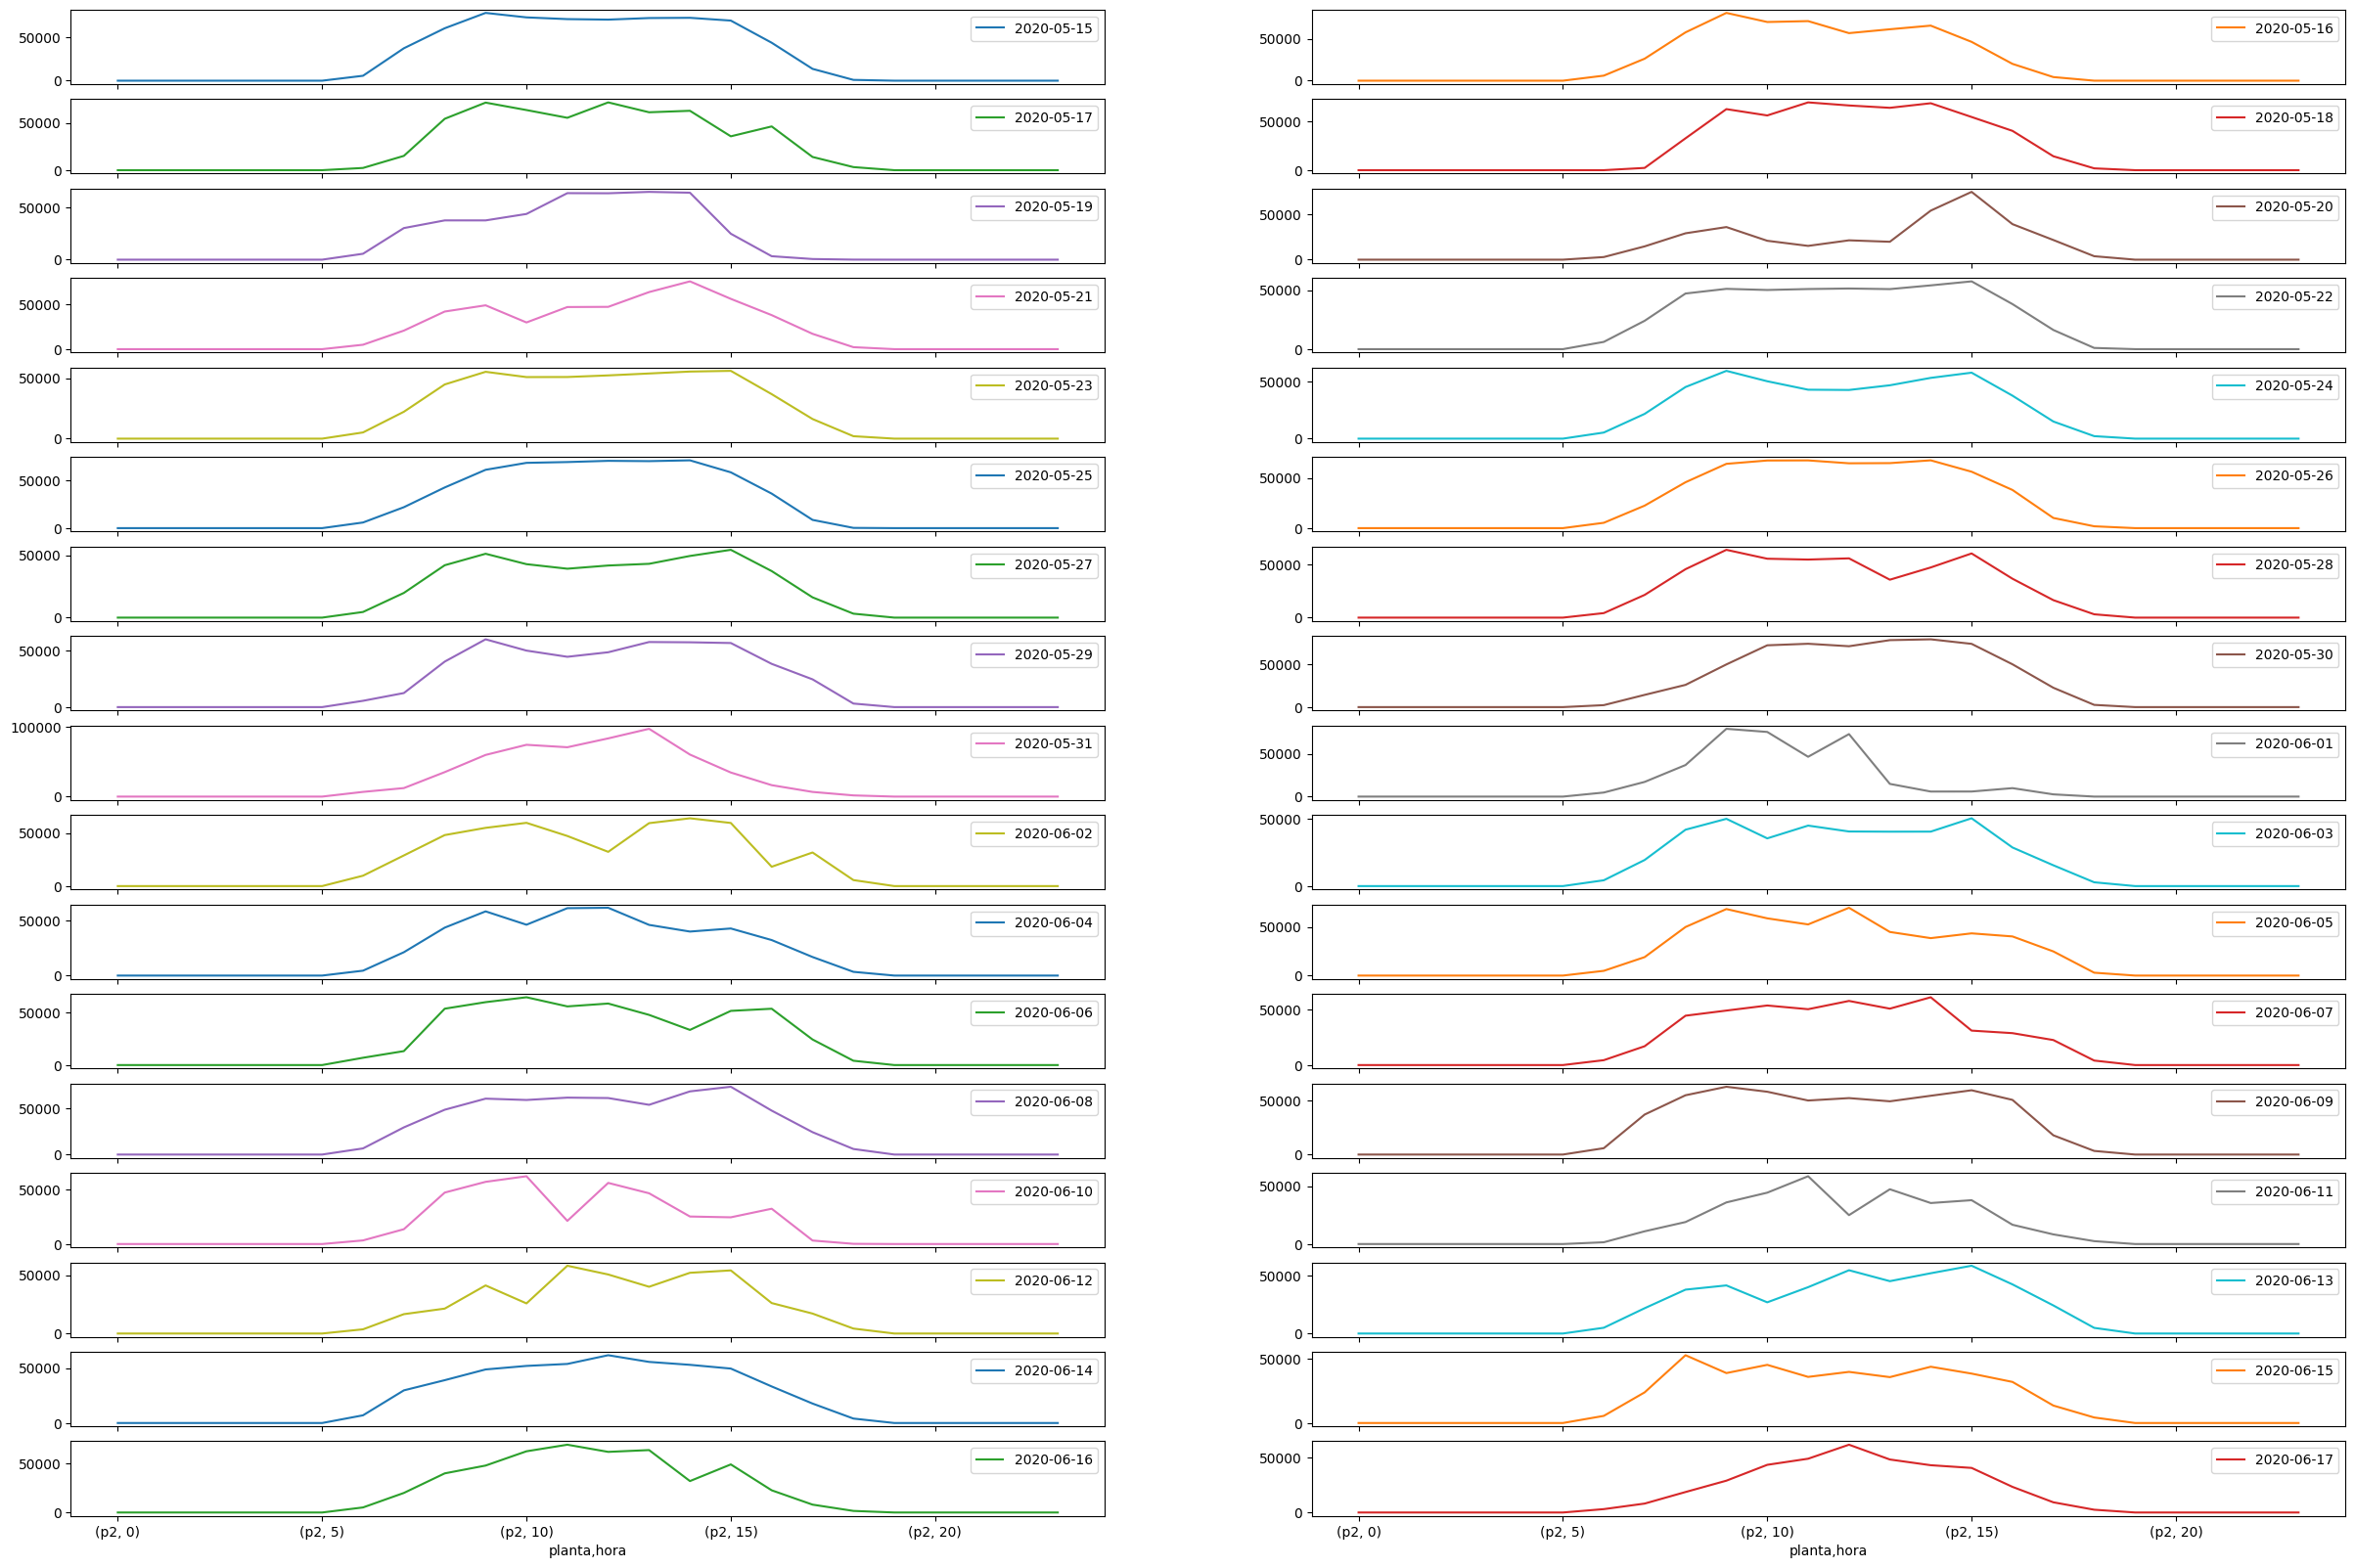

In [118]:
df_hora_p2.unstack(level=0).plot(subplots=True,layout=(17,2),figsize=(30,20),sharex=True);

Veo lo que ya destacamos en el punto 2.1. Los niveles de kw_dc son 10 veces inferiores a p1. 

Vemos que se mantienen constantes a lo largo de los días.

**Descartamos que esten sucios o que se hayan podido ensuciar.**

## 2.5 Comprovación varaible acumuada de energia (kw_dia)

<Axes: xlabel='hora'>

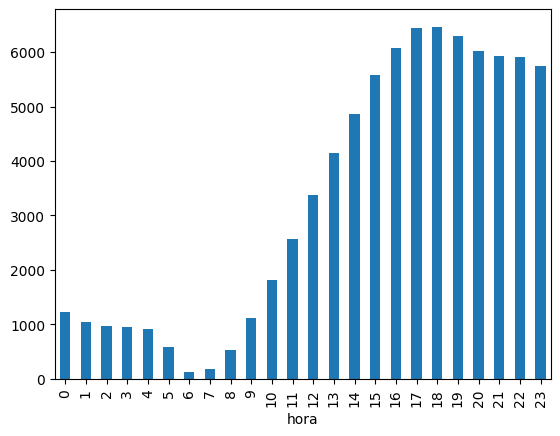

In [96]:
df.groupby('hora')['kw_dia'].mean().plot.bar()

la variable kw_dia es un ACUMULADO. Eso significa que debería alcanzar su máximo cuando llega la última hora del día, donde obviamente la irradiación es cero.

Y no tener datos hasta pasadas las 7 que es cuando vemos que hay irradiación.

Y además a partir de las 18 comienza a decaer, lo cual no debería pasar si es un acumulado.

Conclusión:

No usaré las variables acumuladas como kw_dia y kw_total.

# 3. Conclusiones

Tras un ananálisis de los datos podemos concluir que:
    
* Existen graves problemas de calidad de datos. Se debería revisar en qué parte de la cadena se generan estos problemas, incluyendo los medidores de las plantas.
* El hecho de que la generación en DC sea unas 10 veces superior en la planta 1 que en la 2, sumado al hecho de que la eficiencia en la planta 1 esté sobre el 10% me lleva a pensar que el dato de generación de DC en la planta 1 puede estar artificialmente escalado por algún motivo.
* Pero de momento a falta de comprobación voy a asumir que los datos son correctos.
* La dos plantas han recibido altas cantidades de irradiación, no he localizado ningún problema en esta fase
* La generación de DC de la planta 1 funciona bien, los módulos parecen llevar DC a los inverters.
* La generación de DC de la planta 2 NO funciona bien, algunos módulos llevan muy poco DC a los inverters incluso en las horas de mayor irradiación.
* La transformación de DC a AC de la planta 1 NO funciona bien, solo se transforma en torno al 10%, eso sí, de forma constante. Y esta baja eficiencia no es debida a momentos de no recepción de DC ni se concentra en inverters concretos, si no que parece más estructural (de nuevo tener en cuenta que podría deberse a un problema de calidad de datos en kw_dc de la planta 1
* La transformación de DC a AC de la planta 2 funciona bien, ya que una vez eliminados los períodos de generación cero de DC el resto tienen una eficiencia superior al 97%

Recomendaciones:

* Revisar la captación de datos y su fiabilidad
* Revisión de mantenimiento en los módulos de los inverters  de la planta 2 en los que hay muchos momentos de generación cero de DC
* Revisión de mantenimiento de los inverters de la Planta 1